#Access of the data

In [ ]:
#Mount the googledrive to access files
from google.colab import drive
drive.mount('/content/drive')
#Path of the file
#'/content/drive/MyDrive/......csv')


Mounted at /content/drive


In [ ]:
# Run the code to read a dataset using Pandas
#Import Libraries
import pandas as pd

#load a dataset from the specified path
dataset_path = '/content/drive/MyDrive/studio 3 /Copy of Spotify_user_research_2.xlsx'

try:
 data = pd.read_excel(dataset_path)
 print("data loaded successfully")
except FileNotFoundError:
 print("Dataset not found. Please check the file path.")


data loaded successfully


#Data Preparation and EDA

>

Missing Values: Numeric is filled with median, categorical filled with "Unknown"
Outliers: Detected using IQR, capped at upper/lower whickers

Encoding: Ordinal columns mapped manually,Nominal columns one-hot encoded.

Split:80/20 train-test split, random_state=42 (Reproducible results (same split every time), Class distribution preserved (both train and test sets keep the same target class ratio)

EDA:Class distribution histogram;Univariate histograms and boxplots for numeric vars;Target vs. age, device, genre.:Correlation heatmap (numeric only).



In [ ]:
# Display the number of missing values per column
try:
   missing_values_per_column = data.isnull().sum()
   print(("Missing values:"),missing_values_per_column)
except Exception as e:
   print("No missing values")


Missing values: Age                               0
Gender                            0
spotify_usage_period              0
spotify_listening_device          0
spotify_subscription_plan         0
premium_sub_willingness           0
preffered_premium_plan         8073
preferred_listening_content       0
fav_music_genre                   0
music_time_slot                   0
music_Influencial_mood            0
music_lis_frequency               0
music_expl_method                 0
music_recc_rating                 0
pod_lis_frequency                 0
fav_pod_genre                  5395
preffered_pod_format           7347
pod_host_preference            7385
preffered_pod_duration         6918
pod_variety_satisfaction          0
dtype: int64


In [ ]:
#Impute the missing values based on their attrbiute
# Iterate over columns
try:
  for col in data.columns:
    if data[col].dtype == 'object':
       mode_val=data[col].mode()[0]
       data[col].fillna(mode_val,inplace=True)
    else:
       mean_val=data[col].mean()
       data[col].fillna(mean_val,inplace=True)
  print('Missing values imputed Sucessfully')
except Exception as e:
  print('Missing values not imputed')


Missing values imputed Sucessfully


/tmp/ipython-input-1816436946.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val,inplace=True)
/tmp/ipython-input-1816436946.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
# Display the number of missing values per column
try:
   missing_values_per_column = data.isnull().sum()
   print(("Missing values:"),missing_values_per_column)
except Exception as e:
   print("No missing values")


Missing values: Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64


#Outlier

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

numeric_cols = data.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))

# Identify outliers (Z > 3)
outlier_mask = (z_scores > 3)

# Get rows that contain at least one outlier
outliers = data[outlier_mask.any(axis=1)]

# Print summary
print("Numeric columns:", numeric_cols.columns.tolist())
print("Total rows:", len(data))
print("Outlier rows detected:", len(outliers))

# Show some outlier rows
outliers.head()


Numeric columns: ['music_recc_rating']
Total rows: 28546
Outlier rows detected: 0


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction


#Data Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example 1: One-Hot Encoding (for non-ordinal categories)
data_encoded = pd.get_dummies(data, columns=['Gender', 'spotify_listening_device', 'fav_music_genre'], drop_first=True)

# Example 2: Label Encoding (for ordinal or ordered categories)
label_encoder = LabelEncoder()
data['Age'] = label_encoder.fit_transform(data['Age'])

# Example 3: Group Rare Categories
# If a genre appears in less than 1% of rows, group it into 'Other'
genre_counts = data['fav_music_genre'].value_counts(normalize=True)
rare_genres = genre_counts[genre_counts < 0.01].index
data['fav_music_genre'] = data['fav_music_genre'].replace(rare_genres, 'Other')

# Check the transformed dataset
print(data.head())

   Age  Gender spotify_usage_period            spotify_listening_device  \
0    2  Others    More than 2 years                          Smartphone   
1    1    Male   6 months to 1 year  Smart speakers or voice assistants   
2    0  Female    More than 2 years                  Computer or laptop   
3    0  Female   Less than 6 months                  Computer or laptop   
4    0    Male    1 year to 2 years                          Smartphone   

       spotify_subscription_plan premium_sub_willingness  \
0       Family Plan-Rs 179/month                     Yes   
1       Family Plan-Rs 179/month                      No   
2            Free (ad-supported)                      No   
3       Student Plan-Rs 59/month                      No   
4  Individual Plan- Rs 119/month                     Yes   

          preffered_premium_plan preferred_listening_content fav_music_genre  \
0       Family Plan-Rs 179/month                     Podcast             Pop   
1       Family Plan-Rs 179/m

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
nominal_cols = [
    'Gender', 'spotify_listening_device', 'spotify_subscription_plan',
    'premium_sub_willingness', 'preffered_premium_plan',
    'preferred_listening_content', 'music_time_slot', 'music_Influencial_mood',
    'music_expl_method', 'fav_pod_genre', 'preffered_pod_format',
    'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction'
]

data_encoded = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

for col in ['fav_music_genre', 'fav_pod_genre']:
    counts = data[col].value_counts(normalize=True)
    rare = counts[counts < 0.01].index
    data[col] = data[col].replace(rare, 'Other')

    data.fillna('Unknown', inplace=True)

    print(data.head())



   Age  Gender spotify_usage_period            spotify_listening_device  \
0    2  Others    More than 2 years                          Smartphone   
1    1    Male   6 months to 1 year  Smart speakers or voice assistants   
2    0  Female    More than 2 years                  Computer or laptop   
3    0  Female   Less than 6 months                  Computer or laptop   
4    0    Male    1 year to 2 years                          Smartphone   

       spotify_subscription_plan premium_sub_willingness  \
0       Family Plan-Rs 179/month                     Yes   
1       Family Plan-Rs 179/month                      No   
2            Free (ad-supported)                      No   
3       Student Plan-Rs 59/month                      No   
4  Individual Plan- Rs 119/month                     Yes   

          preffered_premium_plan preferred_listening_content fav_music_genre  \
0       Family Plan-Rs 179/month                     Podcast             Pop   
1       Family Plan-Rs 179/m

In [ ]:
nominal_cols = [
    'Gender', 'spotify_listening_device', 'spotify_subscription_plan',
    'premium_sub_willingness', 'preffered_premium_plan',
    'preferred_listening_content', 'fav_music_genre',
    'music_time_slot', 'music_Influencial_mood', 'music_expl_method',
    'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
    'preffered_pod_duration', 'pod_variety_satisfaction'
]

data_encoded = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

print(data_encoded.head())
print(data_encoded.info())

   Age spotify_usage_period music_lis_frequency  music_recc_rating  \
0    2    More than 2 years         Once a week                  5   
1    1   6 months to 1 year              Rarely                  1   
2    0    More than 2 years              Rarely                  4   
3    0   Less than 6 months              Rarely                  5   
4    0    1 year to 2 years         Once a week                  4   

      pod_lis_frequency  Gender_Male  Gender_Others  \
0                 Daily        False           True   
1           Once a week         True          False   
2  Several times a week        False          False   
3                 Daily        False          False   
4                Rarely         True          False   

   spotify_listening_device_Computer or laptop, Smart speakers or voice assistants  \
0                                              False                                 
1                                              False                        

In [ ]:
data_encoded['music_lis_frequency'] = data_encoded['music_lis_frequency'].apply(
    lambda x: x if x in ['Rarely', 'Once a week', 'Several times a week', 'Daily'] else 'Unknown'
)

data_encoded['pod_lis_frequency'] = data_encoded['pod_lis_frequency'].apply(
    lambda x: x if x in ['Rarely', 'Once a week', 'Several times a week', 'Daily'] else 'Unknown'
)
ordinal_mapping = {
    'music_lis_frequency': ['Rarely', 'Once a week', 'Several times a week', 'Daily', 'Unknown'],
    'pod_lis_frequency': ['Rarely', 'Once a week', 'Several times a week', 'Daily', 'Unknown']
}
from sklearn.preprocessing import OrdinalEncoder

for col, order in ordinal_mapping.items():
    data_encoded[col] = OrdinalEncoder(categories=[order], dtype=int).fit_transform(data_encoded[[col]])

    print(data_encoded.head())
print(data_encoded.info())



   Age spotify_usage_period  music_lis_frequency  music_recc_rating  \
0    2    More than 2 years                    1                  5   
1    1   6 months to 1 year                    0                  1   
2    0    More than 2 years                    0                  4   
3    0   Less than 6 months                    0                  5   
4    0    1 year to 2 years                    1                  4   

      pod_lis_frequency  Gender_Male  Gender_Others  \
0                 Daily        False           True   
1           Once a week         True          False   
2  Several times a week        False          False   
3                 Daily        False          False   
4                Rarely         True          False   

   spotify_listening_device_Computer or laptop, Smart speakers or voice assistants  \
0                                              False                                 
1                                              False                  

In [ ]:
bool_cols = data_encoded.select_dtypes(include='bool').columns
print(bool_cols)
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)
print(data_encoded.head())         # check first 5 rows
print(data_encoded.dtypes)         # check all column types
print(data_encoded.select_dtypes(include='object').columns)


Index(['Gender_Male', 'Gender_Others',
       'spotify_listening_device_Computer or laptop, Smart speakers or voice assistants',
       'spotify_listening_device_Computer or laptop, Smart speakers or voice assistants, Wearable devices',
       'spotify_listening_device_Computer or laptop, Wearable devices',
       'spotify_listening_device_Smart speakers or voice assistants',
       'spotify_listening_device_Smart speakers or voice assistants, Wearable devices',
       'spotify_listening_device_Smartphone',
       'spotify_listening_device_Smartphone, Computer or laptop',
       'spotify_listening_device_Smartphone, Computer or laptop, Smart speakers or voice assistants',
       ...
       'preffered_pod_duration_Long (more than 30 minutes)',
       'preffered_pod_duration_Longer',
       'preffered_pod_duration_Medium (15-30 minutes)',
       'preffered_pod_duration_Short (less than 15 minutes)',
       'preffered_pod_duration_Shorter', 'pod_variety_satisfaction_Neutral',
       'pod_

In [ ]:
 #Define mapping (adjusted according to original categories)
period_mapping = {
    'Less than 6 months': 0,
    '6 months to 1 year': 1,
    '1 year to 2 years': 2,
    'More than 2 years': 3,
    'Unknown':4
}

data_encoded['spotify_usage_period'] = data_encoded['spotify_usage_period'].map(period_mapping)
print(data_encoded.head())          # first 5 rows
print(data_encoded.info())

   Age  spotify_usage_period  music_lis_frequency  music_recc_rating  \
0    2                     3                    1                  5   
1    1                     1                    0                  1   
2    0                     3                    0                  4   
3    0                     0                    0                  5   
4    0                     2                    1                  4   

   pod_lis_frequency  Gender_Male  Gender_Others  \
0                  3            0              1   
1                  1            1              0   
2                  2            0              0   
3                  3            0              0   
4                  0            1              0   

   spotify_listening_device_Computer or laptop, Smart speakers or voice assistants  \
0                                                  0                                 
1                                                  0                              

In [ ]:
# Fill unknown/missing categories with 'Unknown' (or a default value)
data_encoded['spotify_usage_period'] = data_encoded['spotify_usage_period'].fillna('Unknown')

# Map ordinal categories to numbers, including 'Unknown'
period_mapping = {
    'Less than 6 months': 0,
    '6 months to 1 year': 1,
    '1 year to 2 years': 2,
    'More than 2 years': 3,
    'Unknown': 4  # map unknown to a number
}

data_encoded['spotify_usage_period'] = data_encoded['spotify_usage_period'].map(period_mapping)

print(data_encoded.head())
print(data_encoded.info())

   Age  spotify_usage_period  music_lis_frequency  music_recc_rating  \
0    2                   NaN                    1                  5   
1    1                   NaN                    0                  1   
2    0                   NaN                    0                  4   
3    0                   NaN                    0                  5   
4    0                   NaN                    1                  4   

   pod_lis_frequency  Gender_Male  Gender_Others  \
0                  3            0              1   
1                  1            1              0   
2                  2            0              0   
3                  3            0              0   
4                  0            1              0   

   spotify_listening_device_Computer or laptop, Smart speakers or voice assistants  \
0                                                  0                                 
1                                                  0                              

In [ ]:
 #Check missing values again
missing_counts = data.isnull().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


In [ ]:
# Fill missing numeric values with median
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [ ]:
import numpy as np

def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

data = cap_outliers_iqr(data, numeric_cols)

In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'music_recc_rating' with actual target variable
target_col = 'music_recc_rating'
X = data.drop(columns=[target_col])
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # keep class balance
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (22836, 19)
Test shape: (5710, 19)


In [ ]:
import os
fig_dir = "A3_Fig_EDA"
os.makedirs(fig_dir, exist_ok=True)

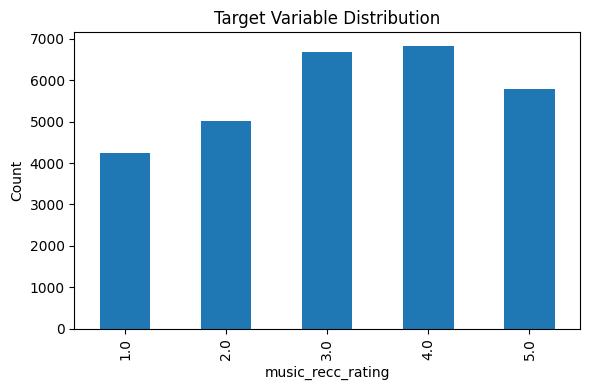

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
y.value_counts().sort_index().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"{fig_dir}/target_distribution.png")
plt.show()

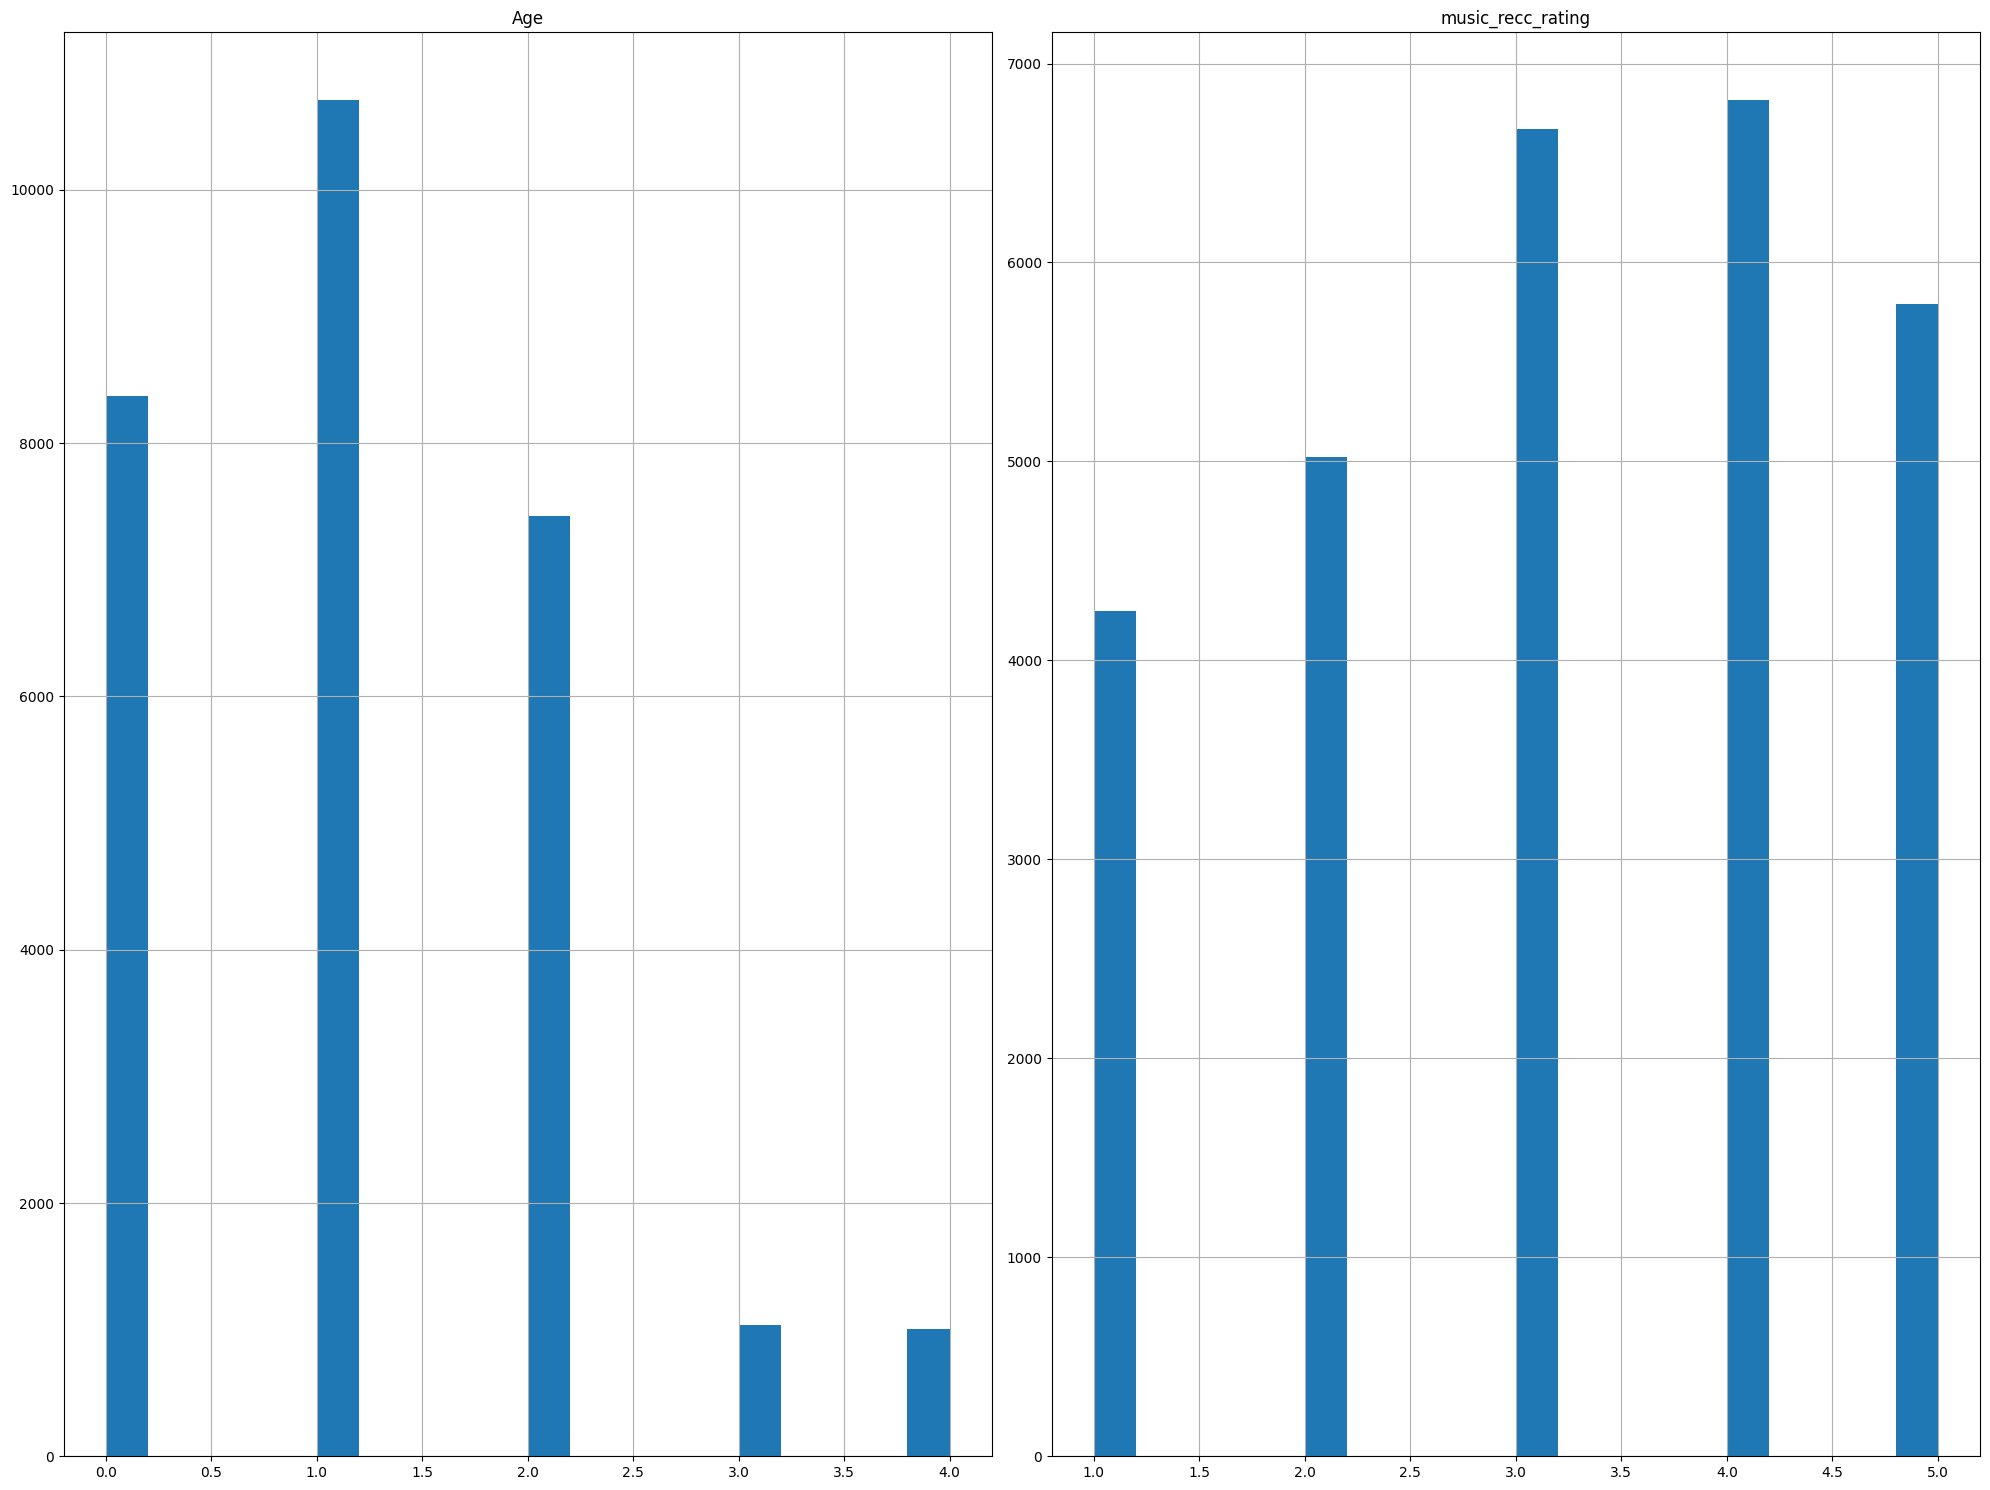

In [ ]:
data[numeric_cols].hist(figsize=(20,15), bins=20)
plt.tight_layout()
plt.savefig(f"{fig_dir}/univariate_histograms.png")
plt.show()

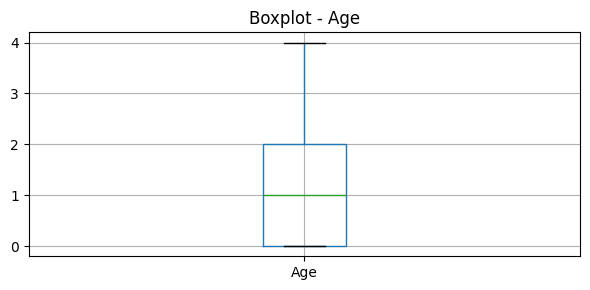

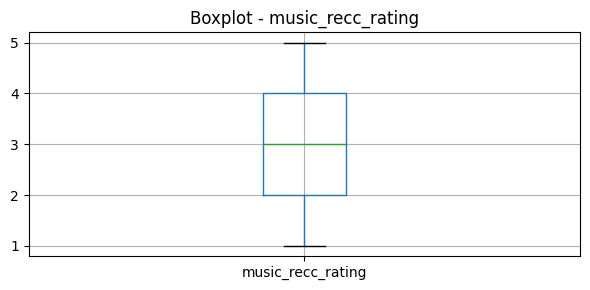

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    data.boxplot(column=col)
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.savefig(f"{fig_dir}/boxplot_{col}.png")
    plt.show()
    plt.close()


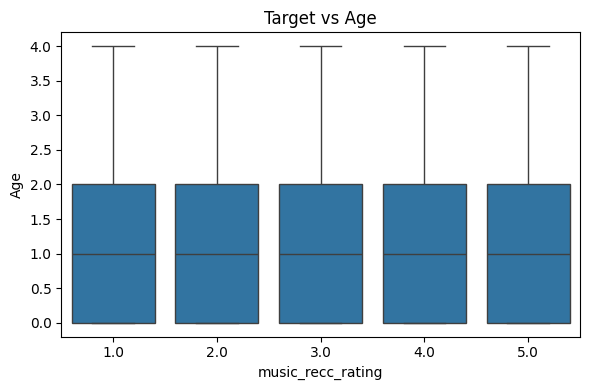

In [ ]:
# Example: Target vs Age
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=data['Age'])
plt.title('Target vs Age')
plt.tight_layout()
plt.savefig(f"{fig_dir}/bivariate_target_age.png")
plt.show()


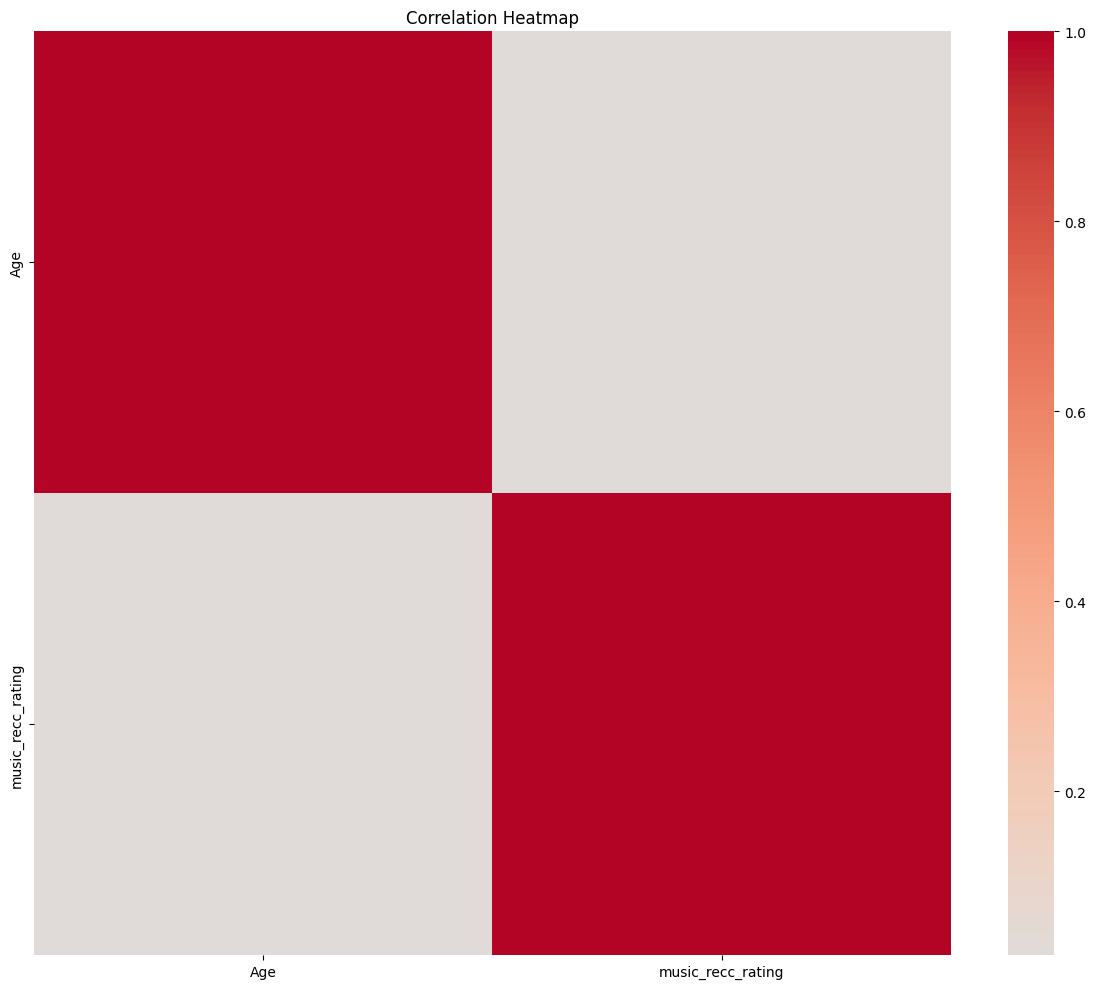

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig(f"{fig_dir}/correlation_heatmap.png")
plt.show()

In [ ]:
data.to_csv('spotify_clean.csv', index=False)
# or Parquet (preferred for size)
data.to_parquet('spotify_clean.parquet')

#Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
#Replace 'music_recc_rating' with your actual target column name if it's different
X = data.drop('music_recc_rating', axis=1)
y = data['music_recc_rating']

# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # helps keep class distribution the same
)

# Check shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (22836, 19)
Test set shape: (5710, 19)


#Export the clean dataset


In [ ]:
# Export the cleaned full dataset
data.to_csv('spotify_clean.csv', index=False)
data.to_parquet('spotify_clean.parquet', index=False)

# Export the train/test splits
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [ ]:
import os

# Make a folder if it doesn't exist
os.makedirs('A3_Clean_Data', exist_ok=True)

# Save files into the folder
data.to_csv('A3_Clean_Data/spotify_clean.csv', index=False)
data.to_parquet('A3_Clean_Data/spotify_clean.parquet', index=False)

X_train.to_csv('A3_Clean_Data/X_train.csv', index=False)
X_test.to_csv('A3_Clean_Data/X_test.csv', index=False)
y_train.to_csv('A3_Clean_Data/y_train.csv', index=False)
y_test.to_csv('A3_Clean_Data/y_test.csv', index=False)

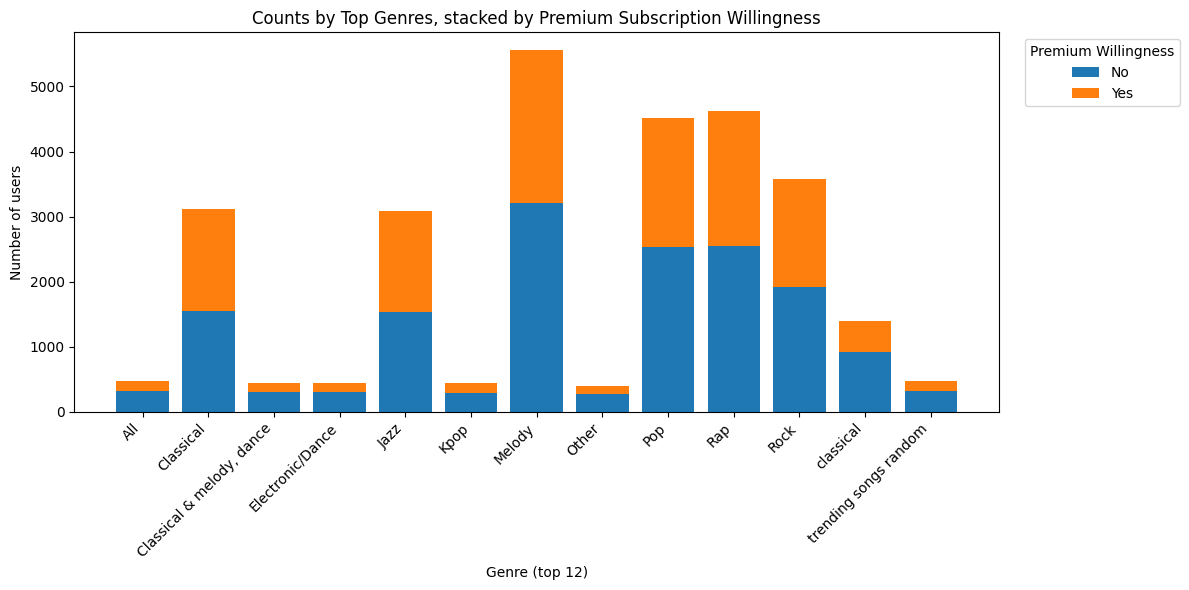

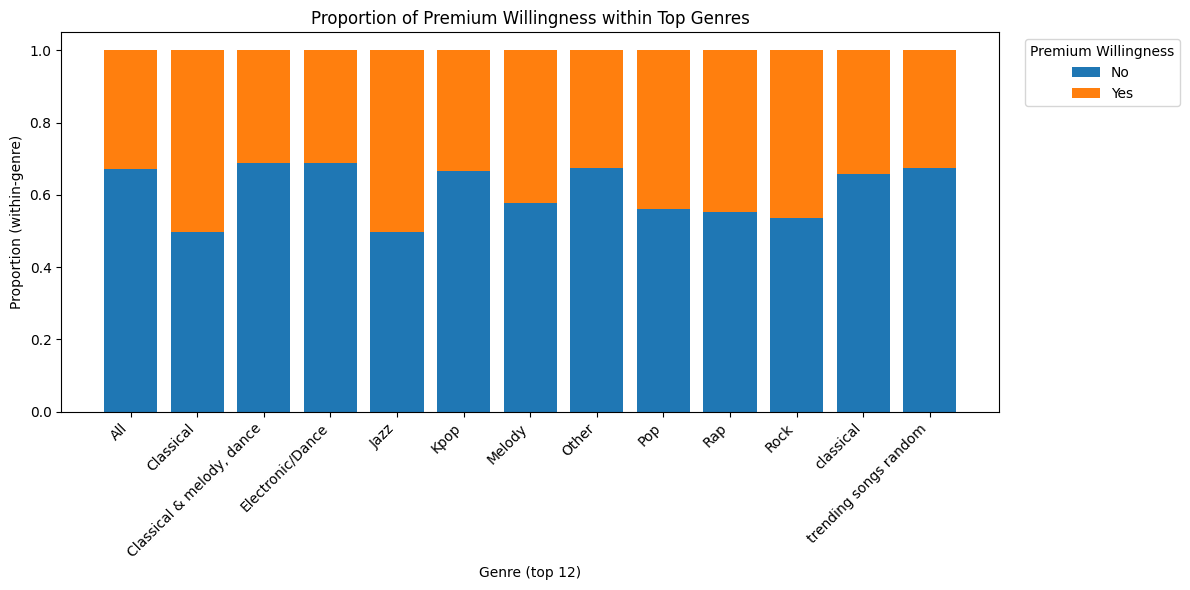

Genre vs Target chi2: 320.7097290270943 p= 2.082884257060076e-61


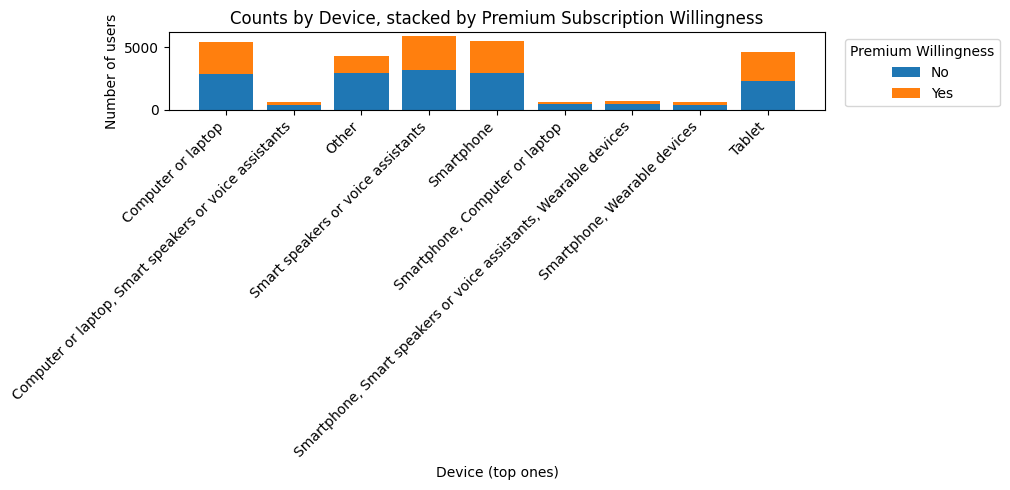

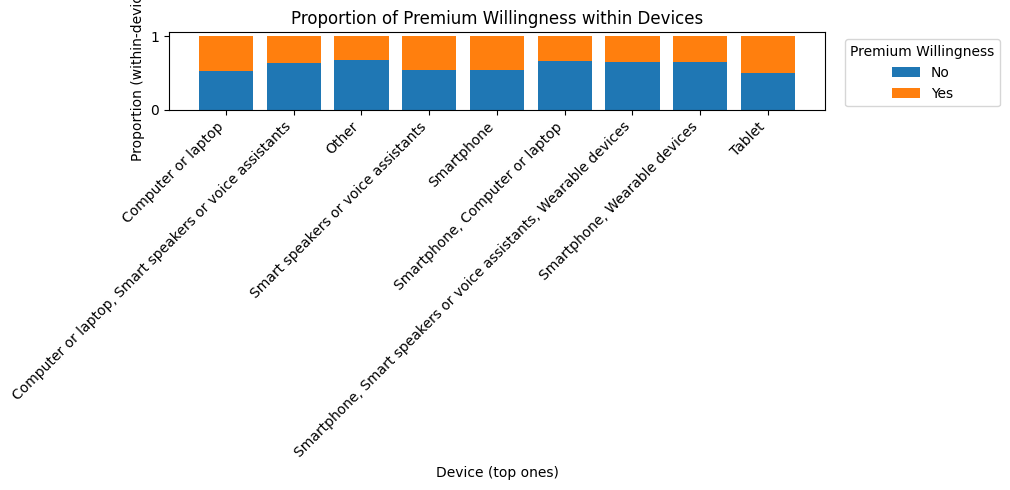

Device vs Target chi2: 428.88698798163335 p= 1.2309798278472831e-87


In [ ]:
# bivariate: target vs genre / device
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

target_col = 'premium_sub_willingness'
genre_col = 'fav_music_genre'
device_col = 'spotify_listening_device'

out_dir = '/mnt/data/A3_Fig_EDA'
os.makedirs(out_dir, exist_ok=True)

# helper to find columns if names differ
def find_col(candidate):
    cand_clean = candidate.lower().replace('-', '_').replace(' ', '_')
    for c in data.columns:
        if c.lower().replace('-', '_').replace(' ', '_') == cand_clean:
            return c
    for c in data.columns:
        if cand_clean in c.lower():
            return c
    return None

for colname in [target_col, genre_col, device_col]:
    if colname not in data.columns:
        f = find_col(colname)
        if f:
            globals()[colname] = f

for col in [target_col, genre_col, device_col]:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' not found. Columns: {list(data.columns)}")

data[target_col] = data[target_col].fillna('Unknown').astype(str)
data[genre_col] = data[genre_col].fillna('Unknown').astype(str)
data[device_col] = data[device_col].fillna('Unknown').astype(str)

# Top genres
top_n = 12
top_genres = data[genre_col].value_counts().head(top_n).index.tolist()
data['genre_top'] = data[genre_col].where(data[genre_col].isin(top_genres), other='Other')

ct_genre = pd.crosstab(data['genre_top'], data[target_col])
ct_genre_prop = ct_genre.div(ct_genre.sum(axis=1), axis=0)

# stacked counts
fig1, ax1 = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(ct_genre))
classes = ct_genre.columns.tolist()
x = np.arange(len(ct_genre))
for cls in classes:
    ax1.bar(x, ct_genre[cls].values, bottom=bottom, label=str(cls))
    bottom += ct_genre[cls].values
ax1.set_xticks(x); ax1.set_xticklabels(ct_genre.index, rotation=45, ha='right')
ax1.set_title('Counts by Top Genres, stacked by Premium Subscription Willingness')
ax1.set_xlabel('Genre (top {})'.format(top_n)); ax1.set_ylabel('Number of users')
ax1.legend(title='Premium Willingness', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
fig1.savefig(os.path.join(out_dir, 'target_vs_genre_counts_stacked.png'), dpi=150)
plt.show()

# proportion within-genre
fig2, ax2 = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(ct_genre_prop))
for cls in classes:
    ax2.bar(x, ct_genre_prop[cls].values, bottom=bottom, label=str(cls))
    bottom += ct_genre_prop[cls].values
ax2.set_xticks(x); ax2.set_xticklabels(ct_genre_prop.index, rotation=45, ha='right')
ax2.set_title('Proportion of Premium Willingness within Top Genres')
ax2.set_xlabel('Genre (top {})'.format(top_n)); ax2.set_ylabel('Proportion (within-genre)')
ax2.legend(title='Premium Willingness', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
fig2.savefig(os.path.join(out_dir, 'target_vs_genre_proportions.png'), dpi=150)
plt.show()

chi2, p, dof, expected = chi2_contingency(pd.crosstab(data['genre_top'], data[target_col]))
print('Genre vs Target chi2:', chi2, 'p=', p)

# Devices
top_devices = data[device_col].value_counts().head(8).index.tolist()
data['device_top'] = data[device_col].where(data[device_col].isin(top_devices), other='Other')

ct_device = pd.crosstab(data['device_top'], data[target_col])
ct_device_prop = ct_device.div(ct_device.sum(axis=1), axis=0)

fig3, ax3 = plt.subplots(figsize=(10,5))
bottom = np.zeros(len(ct_device))
x_dev = np.arange(len(ct_device))
for cls in classes:
    ax3.bar(x_dev, ct_device[cls].values, bottom=bottom, label=str(cls))
    bottom += ct_device[cls].values
ax3.set_xticks(x_dev); ax3.set_xticklabels(ct_device.index, rotation=45, ha='right')
ax3.set_title('Counts by Device, stacked by Premium Subscription Willingness')
ax3.set_xlabel('Device (top ones)'); ax3.set_ylabel('Number of users')
ax3.legend(title='Premium Willingness', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
fig3.savefig(os.path.join(out_dir, 'target_vs_device_counts_stacked.png'), dpi=150)
plt.show()

fig4, ax4 = plt.subplots(figsize=(10,5))
bottom = np.zeros(len(ct_device_prop))
for cls in classes:
    ax4.bar(x_dev, ct_device_prop[cls].values, bottom=bottom, label=str(cls))
    bottom += ct_device_prop[cls].values
ax4.set_xticks(x_dev); ax4.set_xticklabels(ct_device_prop.index, rotation=45, ha='right')
ax4.set_title('Proportion of Premium Willingness within Devices')
ax4.set_xlabel('Device (top ones)'); ax4.set_ylabel('Proportion (within-device)')
ax4.legend(title='Premium Willingness', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
fig4.savefig(os.path.join(out_dir, 'target_vs_device_proportions.png'), dpi=150)
plt.show()

chi2_d, p_d, dof_d, _ = chi2_contingency(pd.crosstab(data['device_top'], data[target_col]))
print('Device vs Target chi2:', chi2_d, 'p=', p_d)

# Save cross-tabs
ct_genre.to_csv(os.path.join(out_dir, 'crosstab_genre_vs_target_counts.csv'))
ct_genre_prop.to_csv(os.path.join(out_dir, 'crosstab_genre_vs_target_proportions.csv'))
ct_device.to_csv(os.path.join(out_dir, 'crosstab_device_vs_target_counts.csv'))
ct_device_prop.to_csv(os.path.join(out_dir, 'crosstab_device_vs_target_proportions.csv'))


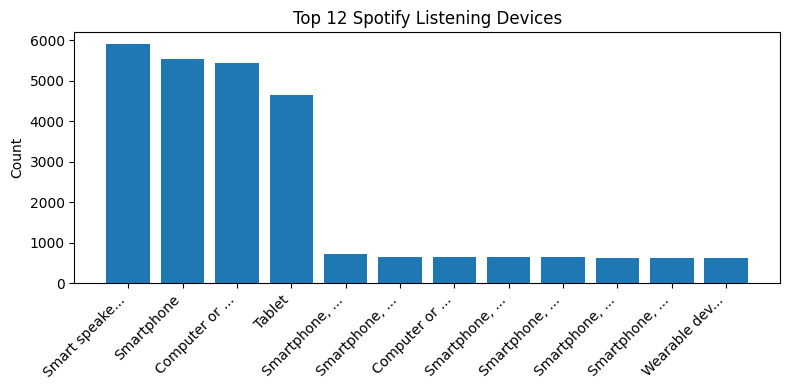

In [ ]:
import matplotlib.pyplot as plt

# Select top N devices
top_n = 12
top_devices = data[device_col].value_counts().head(top_n)

# Shorten long device names automatically (optional: max 15 chars)
short_labels = [label if len(label) <= 15 else label[:12] + '...' for label in top_devices.index]

plt.figure(figsize=(8,4))
plt.bar(top_devices.index, top_devices.values)
plt.xticks(ticks=range(len(short_labels)), labels=short_labels, rotation=45, ha='right')
plt.ylabel('Count')
plt.title(f'Top {top_n} Spotify Listening Devices')
plt.tight_layout()
plt.show()